In [1]:
import tensorflow as tf
from main import layers,load_vgg,optimize

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0
Tests Passed
Tests Passed
Tests Passed


In [2]:
vgg_path = "./data/vgg/"
num_classes = 2
image_shape = (160, 576)
epochs = 50
batch_size = 16


In [3]:
import scipy
import numpy as np
image_file = "./data/data_road/testing/image_2/um_000052.png"

tf.reset_default_graph()
with tf.Session() as sess:
    correct_label = tf.placeholder(tf.int32, [None, None, None, num_classes])
    learning_rate = tf.placeholder(tf.float32)
    
    input_image, keep_prob, vgg_layer3_out, vgg_layer4_out, vgg_layer7_out = \
            load_vgg(sess, vgg_path)

    nn_last_layer = layers(vgg_layer3_out, vgg_layer4_out, vgg_layer7_out, num_classes)

    logits, training_op, cross_entropy_loss = \
            optimize(nn_last_layer, correct_label, learning_rate, num_classes)
        
    saver = tf.train.Saver()
    saver.restore(sess, "./models_l2_norm/eproch_49_loss_8102.5645")
    image = scipy.misc.imresize(scipy.misc.imread(image_file), image_shape)
    im_softmax = sess.run(
            [tf.nn.softmax(logits)],
            {keep_prob: 1.0, input_image: [image]})
    im_softmax = im_softmax[0][:, 1].reshape(image_shape[0], image_shape[1])
    segmentation = (im_softmax > 0.5).reshape(image_shape[0], image_shape[1], 1)
    mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
    mask = scipy.misc.toimage(mask, mode="RGBA")
    street_im = scipy.misc.toimage(image)
    street_im.paste(mask, box=None, mask=mask)

INFO:tensorflow:Restoring parameters from b'./data/vgg/variables/variables'
INFO:tensorflow:Restoring parameters from ./models_l2_norm/eproch_49_loss_8102.5645


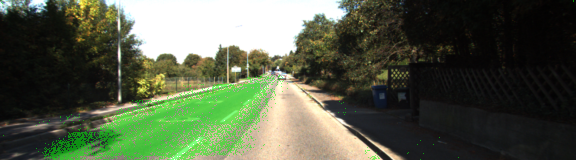

In [4]:
street_im

In [15]:
import os
import time

In [27]:
data_dir = "./data/data_road/testing/image_2"
run_dir = "./runs/"
model_dir = "./models_l2_norm_lr00001_e100/eproch_90_loss_7867.2935"
output_dir = os.path.join(run_dir, "l2_norm_lr00001_e100/eproch_90_cutoff_0.7")
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

os.makedirs(output_dir)    
l_image_file = [ "%s/%s" % (data_dir, image_file) for image_file in os.listdir(data_dir) ]

In [28]:
from tqdm import tqdm
tf.reset_default_graph()
with tf.Session() as sess:
    correct_label = tf.placeholder(tf.int32, [None, None, None, num_classes])
    learning_rate = tf.placeholder(tf.float32)
    
    input_image, keep_prob, vgg_layer3_out, vgg_layer4_out, vgg_layer7_out = \
            load_vgg(sess, vgg_path)

    nn_last_layer = layers(vgg_layer3_out, vgg_layer4_out, vgg_layer7_out, num_classes)

    logits, training_op, cross_entropy_loss = \
            optimize(nn_last_layer, correct_label, learning_rate, num_classes)
        
    saver = tf.train.Saver()
    saver.restore(sess, model_dir)
    
    for image_file in tqdm(l_image_file):
        image = scipy.misc.imresize(scipy.misc.imread(image_file), image_shape)
        im_softmax = sess.run(
            [tf.nn.softmax(logits)],
            {keep_prob: 1.0, input_image: [image]})
        im_softmax = im_softmax[0][:, 1].reshape(image_shape[0], image_shape[1])
        segmentation = (im_softmax > 0.7).reshape(image_shape[0], image_shape[1], 1)
        mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
        mask = scipy.misc.toimage(mask, mode="RGBA")
        street_im = scipy.misc.toimage(image)
        street_im.paste(mask, box=None, mask=mask)
        name = os.path.basename(image_file)
        np_image = np.array(street_im)
        scipy.misc.imsave(os.path.join(output_dir, name), np_image)

INFO:tensorflow:Restoring parameters from b'./data/vgg/variables/variables'
INFO:tensorflow:Restoring parameters from ./models_l2_norm_lr00001_e100/eproch_90_loss_7867.2935


100%|██████████| 290/290 [00:52<00:00,  5.86it/s]
